## Zero-Shot Learning 

http://github.com/jedt


**What is Zero-shot learning?**

* A concept in machine learning
* A variant of transfer learning
* Few-shot = few labels
* One-shot = very few labes - "Hard"
* Zero-shot = zero training labels - "Very Hard"

## Zero-shot has no concrete definition
*  Model architectures
*  Series of Tasks
*  Generalize well to new data

# Problem Areas
*   Cost of hiring Annotators or Labelers
*   No large text corpus available
*   Computer vision 
    * Fine tune a model every new hire?
*   Speech recognition   
    * Layering background noise
    * Formant Shifts
*   Toxic language like hate speech needs to be labeled regularly

## Dr. Maria Carter

**Background:**
Dr. Maria Carter, a seasoned medical practitioner with 15+ years' experience, seeks efficient ways to manage medical transcripts amidst her demanding schedule.

| #  | Goals                     | Description                                                                                             |
|----|---------------------------|---------------------------------------------------------------------------------------------------------|
| 1  | Workflow Efficiency       | Dr. Carter aims to automate initial transcript analysis to prioritize patient care and decision-making. |
| 2  | Accurate Recommendations  | Reliable medical suggestions are crucial for informed decisions; the chatbot must grasp complex medical terms. |
| 3  | Time Optimization         | With a busy routine, quick access to relevant insights is essential to enhance patient care.               |
| 4  | Zero-Shot Learning        | Dr. Carter's interest lies in a chatbot employing zero-shot learning, adapting to various medical contexts. |

## Zero-Shot Learning

Train a recommendation model that uses natural language and can generalize to new transcript records using a chat interface

**Requirements:**
* Download a large text Corpus and train a new classifier model from scratch
* Pre-trained classifier or LLM 


## What is zero-shot learning?

Most often referred to a fairly specific type of task:

* Learn a classifier for a set of classes, 
* Then use that classifier on a new set of classes without any additional training.     


**More broadly, in Machine Learning/NLP recently it can also mean:**

* Get a pre-trained model to do something that it wasn't explicitly trained to do without fine-tuning it on the new task

$P(X|\hat{y}) == Y$ 

$P(A) == B$


**This is sounds too hard and confusing**
* You optimize on one objective but your main target is another objective


## OpenAI GPT-2

The researchers showed that the new and improved GPT model could perform zero-shot learning (ZSL), meaning it could achieve good performance on many tasks without any fine-tuning.
 
* "Who wrote the book the origin of species?" Charles Darwin
* "Who is the founder of the ubuntu project?" Mark Shuttleworth
* None of these questions appear in WebText 

A Géron  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 1006). O'Reilly Media. Kindle Edition. 

**OpenAI WebText is a proprietary crawled dataset from 45M links from Reddit**
which did not have *"Who wrote the book the origin of species"*

**Hypothesis: Simulations** 
* GPT2 Zero-shot is a task inside an architecture
* Something that has generative natural language capabilities from a large corpus
* Simulates a human-like conversation 
* That somehow it trains itself/or n new models to do few-shot learning tasks
* A metric for the synthetic conversation and training labels created from zero-shot learning



Speculations on how much synthetic data OpenAI used to train GPT2 7:30

https://www.youtube.com/watch?v=unotid_qTbw

In [5]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_gpt = pipeline("text-generation", model="gpt2-large")

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [7]:
#generate text
print(pipe_gpt("the book origin of the species was written by ", max_length=50, num_return_sequences=1))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'the book origin of the species was written by ??????)\n\n\nBaron Farkas:\n\n\nMy theory is that that book came out in the past and was just not allowed into the public eye. We never read the original because'}]


In [1]:
print([{'generated_text': 'the book origin of the species was written by vernacular Indian poet-historian Dandakaranya," I met up with him to learn his little-known and much-coveted story and I have to add that, as was'}])

[{'generated_text': 'the book origin of the species was written by vernacular Indian poet-historian Dandakaranya," I met up with him to learn his little-known and much-coveted story and I have to add that, as was'}]


## In Essence

$x$ = "Who wrote the book the origin of species?"

$\hat{y} = f(x)$ = Large Text Corpus -> Transformer -> Zero-shot -> NL generated answer

Some generative natural language tools

* Tiktokken
* SentencePiece

## Since Zero shot has "no concrete definition"

**What value this concept gives us?**

* Efficiently generalize well to new data
* Accurately labels new data with small training data 
  * fine-tuning is not required
* Generative in nature
  * Can be used for data augmentation
* When you tried regularization and it didn't work
* Dropout, L1, L2, Early stopping, etc.


# Let's Simplify Zero-shot learning

In [2]:
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", multi_label=True)

NameError: name 'pipeline' is not defined

In [4]:
# Using pre-trained word embeddings
# https://keras.io/examples/nlp/pretrained_word_embeddings/
# Text classification on the Newsgroup20 dataset using pre-trained GloVe word embeddings.
# Input a novel sentence 
# and output:
# ['talk.religion.misc', 'comp.windows.x', 'comp.sys.ibm.pc.hardware', 
# 'alt.atheism', 'rec.motorcycles', 'sci.space', 'talk.politics.misc', 
# 'rec.sport.hockey', 'talk.politics.guns', 'comp.graphics', 'rec.autos', 
# 'misc.forsale', 'sci.med', 'sci.crypt', 'sci.electronics', 
# 'comp.sys.mac.hardware', 'soc.religion.christian', 'comp.os.ms-windows.misc', 
# 'talk.politics.mideast', 'rec.sport.baseball']

from transformers import pipeline

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


In [6]:
pre_test_data = classifier("How do I make friends?", 
          ["factual", "knowledge-based", "objective"]
)

print(pre_test_data)

{'sequence': 'How do I make friends?', 'labels': ['knowledge-based', 'objective', 'factual'], 'scores': [0.3771112859249115, 0.020045965909957886, 0.006746804341673851]}


In [7]:
pre_test_data = classifier("Intel Corporation (commonly known as Intel) is an American multinational corporation and technology company headquartered in Santa Clara, California. It is one of the world's largest semiconductor chip manufacturer by revenue,[3][4] and is one of the developers of the x86 series of instruction sets found in most personal computers (PCs). Incorporated in Delaware,[5] Intel ranked No. 45 in the 2020 Fortune 500 list of the largest United States corporations by total revenue for nearly a decade, from 2007 to 2016 fiscal years.[6]", 
          ["factual", "knowledge-based", "objective"]
)

print(pre_test_data)

{'sequence': "Intel Corporation (commonly known as Intel) is an American multinational corporation and technology company headquartered in Santa Clara, California. It is one of the world's largest semiconductor chip manufacturer by revenue,[3][4] and is one of the developers of the x86 series of instruction sets found in most personal computers (PCs). Incorporated in Delaware,[5] Intel ranked No. 45 in the 2020 Fortune 500 list of the largest United States corporations by total revenue for nearly a decade, from 2007 to 2016 fiscal years.[6]", 'labels': ['knowledge-based', 'factual', 'objective'], 'scores': [0.769160270690918, 0.5936468839645386, 0.5607870817184448]}


In [8]:
test_data = classifier("Intel Corporation (commonly known as Intel) is an American multinational corporation and technology company headquartered in Santa Clara, California. It is one of the world's largest semiconductor chip manufacturer by revenue,[3][4] and is one of the developers of the x86 series of instruction sets found in most personal computers (PCs). Incorporated in Delaware,[5] Intel ranked No. 45 in the 2020 Fortune 500 list of the largest United States corporations by total revenue for nearly a decade, from 2007 to 2016 fiscal years.[6]", 
          ["Academia and Education",
            "Arts and Entertainment",
            "Business and Economics",
            "Computers and Technology",
            "Health and Medicine",
            "Law and Government",
            "Lifestyle",
            "Nature and Environment",
            "Religion and Spirituality",
            "Science and Mathematics",
            "Social Issues and Ethics",
            "Sports and Physical Activities",
            "News and Media",
            "Hobbies and Interests",
            "Transportation and Infrastructure",
            "Miscellaneous"
        ]
)

In [9]:
print(test_data)

{'sequence': "Intel Corporation (commonly known as Intel) is an American multinational corporation and technology company headquartered in Santa Clara, California. It is one of the world's largest semiconductor chip manufacturer by revenue,[3][4] and is one of the developers of the x86 series of instruction sets found in most personal computers (PCs). Incorporated in Delaware,[5] Intel ranked No. 45 in the 2020 Fortune 500 list of the largest United States corporations by total revenue for nearly a decade, from 2007 to 2016 fiscal years.[6]", 'labels': ['Computers and Technology', 'Business and Economics', 'Social Issues and Ethics', 'Law and Government', 'Lifestyle', 'Hobbies and Interests', 'Science and Mathematics', 'Health and Medicine', 'Sports and Physical Activities', 'Religion and Spirituality', 'Transportation and Infrastructure', 'Nature and Environment', 'Academia and Education', 'News and Media', 'Miscellaneous', 'Arts and Entertainment'], 'scores': [0.9772196412086487, 0.4

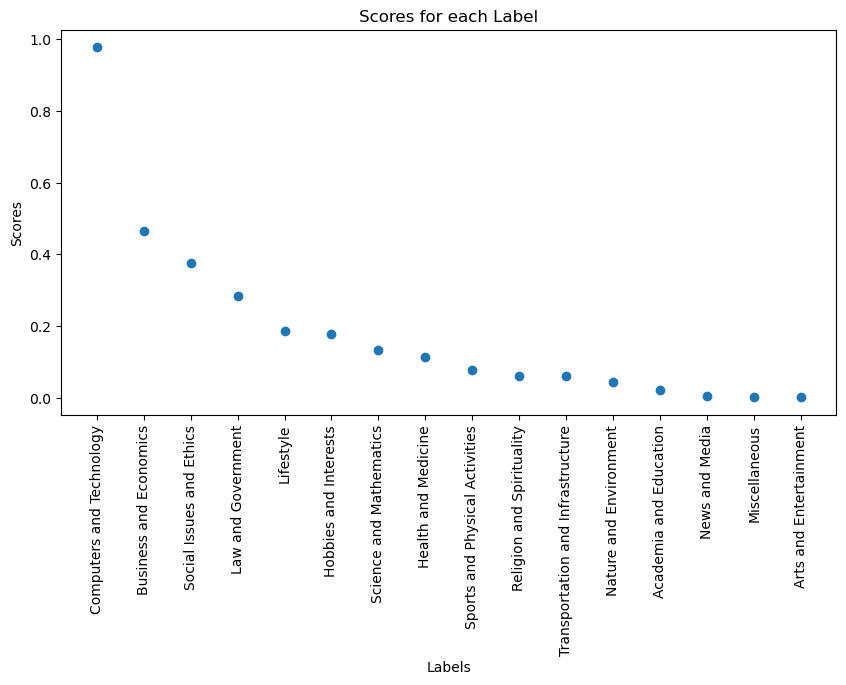

In [10]:
import matplotlib.pyplot as plt
# extract the labels and scores from the data
labels = test_data['labels']
scores = test_data['scores']

# create a scatter plot
plt.figure(figsize=(10,5))
plt.scatter(labels, scores)
plt.xticks(rotation=90)  # rotate x labels for better readability
plt.xlabel('Labels')
plt.ylabel('Scores')
plt.title('Scores for each Label')
plt.show()

In [11]:
pre_test_data = classifier("Who wrote the book the origin of species?", 
          ["factual", "knowledge-based"]
)
print(pre_test_data)

{'sequence': 'Who wrote the book the origin of species?', 'labels': ['knowledge-based', 'factual'], 'scores': [0.9521422982215881, 0.0432523712515831]}


In [12]:
pre_test_labels = pre_test_data['labels']
pre_test_labels

['knowledge-based', 'factual']

In [13]:
pre_test_factual_data = classifier("Who wrote the book the origin of species?", 
          [{"nature of the factual question":["Descriptive", "Comparative", "Causal", "Biographical", "Geographical", "Historical", "Scientific"]}]
)

test_data = classifier("Who wrote the book the origin of species?", 
          ["Academia and Education",
            "Arts and Entertainment",
            "Business and Economics",
            "Computers and Technology",
            "Health and Medicine",
            "Law and Government",
            "Lifestyle",
            "Nature and Environment",
            "Religion and Spirituality",
            "Science and Mathematics",
            "Social Issues and Ethics",
            "Sports and Physical Activities",
            "News and Media",
            "Hobbies and Interests",
            "Transportation and Infrastructure",
            "Miscellaneous"
        ]
)

In [14]:
print(pre_test_data)

{'sequence': 'Who wrote the book the origin of species?', 'labels': ['knowledge-based', 'factual'], 'scores': [0.9521422982215881, 0.0432523712515831]}


In [15]:
print(test_data)

{'sequence': 'Who wrote the book the origin of species?', 'labels': ['Nature and Environment', 'Science and Mathematics', 'Lifestyle', 'Academia and Education', 'Miscellaneous', 'Social Issues and Ethics', 'Hobbies and Interests', 'Transportation and Infrastructure', 'Religion and Spirituality', 'News and Media', 'Health and Medicine', 'Sports and Physical Activities', 'Business and Economics', 'Arts and Entertainment', 'Law and Government', 'Computers and Technology'], 'scores': [0.13140596449375153, 0.004675674717873335, 0.0011849809670820832, 0.0011556673562154174, 0.0008051004260778427, 0.0005069125327281654, 0.0004829400568269193, 0.00042888260213658214, 0.0004136243078391999, 0.00036801391979679465, 0.00033022009301930666, 0.0002339092461625114, 0.00022968242410570383, 0.00018475174147170037, 0.00018106747302226722, 0.0001296051632380113]}


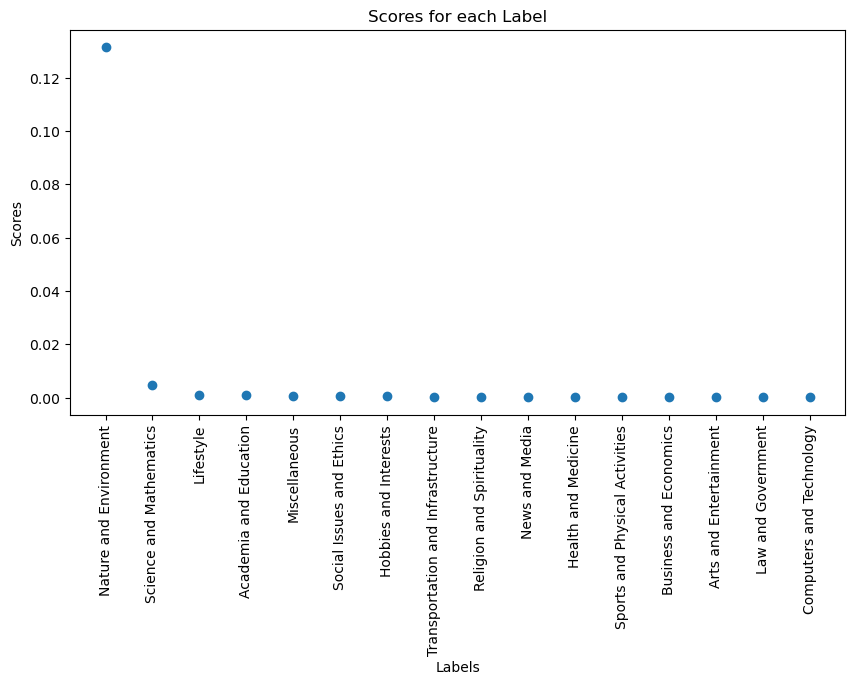

In [16]:
labels = test_data['labels']
scores = test_data['scores']

plt.figure(figsize=(10,5))
plt.scatter(labels, scores)
plt.xticks(rotation=90)  # rotate x labels for better readability
plt.xlabel('Labels')
plt.ylabel('Scores')
plt.title('Scores for each Label')
plt.show()

In [17]:
taxonomy = [
    ['Academia and Education', [
        ['Humanities', ['History', 'Philosophy', 'Linguistics']],
        ['Sciences', ['Biology', 'Chemistry', 'Physics']],
        ['Social Sciences', ['Sociology', 'Psychology', 'Anthropology']],
        ['Vocational and Technical Training', ['Automotive Technology', 'Culinary Arts', 'Health Sciences']]
    ]],
    ['Arts and Entertainment', [
        ['Visual Arts', ['Painting', 'Sculpture', 'Photography']],
        ['Performing Arts', ['Theater', 'Dance', 'Music']],
        ['Literature', ['Fiction', 'Non-fiction', 'Poetry']],
        ['Film and Television', ['Movies', 'TV Shows', 'Documentaries']]
    ]],
    ['Business and Economics', [
        ['Finance', ['Investment', 'Banking', 'Accounting']],
        ['Marketing', ['Advertising', 'Digital Marketing', 'Public Relations']],
        ['Management', ['Leadership', 'Project Management', 'Human Resources']],
        ['Economics', ['Microeconomics', 'Macroeconomics', 'Behavioral Economics']]
    ]],
    ['Computers and Technology', [
        ['Software Development', ['Programming Languages', 'Web Development', 'Mobile App Development']],
        ['Hardware', ['Computer Components', 'Peripherals', 'Mobile Devices']],
        ['Networking', ['Internet', 'Local Area Networks', 'Wide Area Networks']],
        ['Artificial Intelligence', ['Machine Learning', 'Neural Networks', 'Robotics']]
    ]],
    ['Health and Medicine', [
        ['Public Health', ['Epidemiology', 'Health Policy', 'Preventive Medicine']],
        ['Mental Health', ['Psychology', 'Psychiatry', 'Counseling']],
        ['Medicine', ['Surgery', 'Pediatrics', 'Internal Medicine']],
        ['Alternative Medicine', ['Acupuncture', 'Homeopathy', 'Naturopathy']]
    ]],
    ['Law and Government', [
        ['Legislation', ['Criminal Law', 'Civil Law', 'Constitutional Law']],
        ['Governance', ['Public Administration', 'Political Science', 'Public Policy']],
        ['International Relations', ['Diplomacy', 'Conflict Resolution', 'International Organizations']],
        ['Public Policy', ['Social Policy', 'Economic Policy', 'Environmental Policy']]
    ]],
    ['Lifestyle', [
        ['Food and Drink', ['Cooking', 'Wine and Spirits', 'Food Culture']],
        ['Fashion', ['Clothing', 'Accessories', 'Beauty and Makeup']],
        ['Travel', ['Destinations', 'Travel Planning', 'Adventure Travel']],
        ['Leisure and Recreation', ['Hobbies', 'Outdoor Activities', 'Games and Puzzles']]
    ]],
    ['Nature and Environment', [
        ['Ecology', ['Ecosystems', 'Biodiversity', 'Conservation Biology']],
        ['Geology', ['Mineralogy', 'Seismology', 'Paleontology']],
        ['Climate Change', ['Global Warming', 'Climate Modeling', 'Mitigation and Adaptation']],
        ['Conservation', ['Wildlife Conservation', 'Habitat Conservation', 'Environmental Protection']]
    ]],
    ['Religion and Spirituality', [
        ['Theology', ['Christian Theology', 'Islamic Theology', 'Hindu Theology']],
        ['Comparative Religion', ['Abrahamic Religions', 'Eastern Religions', 'Indigenous Religions']],
        ['Atheism and Agnosticism', ['Secular Humanism', 'Skepticism', 'Freethought']],
        ['Spirituality', ['Meditation', 'Mindfulness', 'New Age']]
    ]],
    ['Science and Mathematics', [
        ['Physics', ['Classical Mechanics', 'Quantum Mechanics', 'Thermodynamics']],
        ['Chemistry', ['Organic Chemistry', 'Inorganic Chemistry', 'Analytical Chemistry']],
        ['Biology', ['Genetics', 'Evolution', 'Ecology']],
        ['Mathematics', ['Algebra', 'Calculus', 'Statistics']]
    ]],
    ['Social Issues and Ethics', [
        ['Human Rights', ['Civil Rights', 'Women\'s Rights', 'LGBTQ+ Rights']],
        ['Social Justice', ['Income Inequality', 'Racial Justice', 'Gender Equality']],
        ['Ethics and Morality', ['Bioethics', 'Environmental Ethics', 'Business Ethics']],
        ['Identity Politics', ['Nationalism', 'Feminism', 'Intersectionality']]
    ]],
    ['Sports and Physical Activities', [
        ['Team Sports', ['Football', 'Basketball', 'Soccer']],
        ['Individual Sports', ['Tennis', 'Swimming', 'Athletics']],
        ['Outdoor Activities', ['Hiking', 'Cycling', 'Fishing']],
        ['Fitness and Exercise', ['Gym Workouts', 'Yoga', 'Pilates']]
    ]],
    ['News and Media', [
        ['Journalism', ['Investigative Journalism', 'Broadcast Journalism', 'Print Journalism']],
        ['Social Media', ['Facebook', 'Twitter', 'Instagram']],
        ['Broadcast Media', ['Television', 'Radio', 'Podcasts']],
        ['Print Media', ['Newspapers', 'Magazines', 'Books']]
    ]],
    ['Hobbies and Interests', [
        ['Collecting', ['Stamp Collecting', 'Coin Collecting', 'Art Collecting']],
        ['Gaming', ['Video Games', 'Board Games', 'Role-playing Games']],
        ['Crafts', ['Knitting', 'Woodworking', 'Painting']],
        ['Music', ['Playing Instruments', 'Listening to Music', 'Composing Music']]
    ]],
    ['Transportation and Infrastructure', [
        ['Public Transport', ['Buses', 'Trains', 'Subways']],
        ['Roads and Highways', ['Road Construction', 'Traffic Management', 'Road Safety']],
        ['Air Travel', ['Airlines', 'Airports', 'Air Traffic Control']],
        ['Shipping', ['Ports', 'Freight Shipping', 'Maritime Safety']]
    ]],
    ['Miscellaneous', [
        ['Urban Legends and Myths', ['Ghost Stories', 'Cryptids', 'Conspiracy Theories']],
        ['Conspiracy Theories', ['UFOs', 'Government Cover-ups', 'Secret Societies']],
        ['Unexplained Phenomena', ['Paranormal Activities', 'Mysterious Disappearances', 'Unidentified Objects']],
        ['Memes and Internet Culture', ['Internet Memes', 'Viral Videos', 'Social Media Trends']]
    ]]
]


In [18]:
third_level_values = []

for category in taxonomy:
    for subcategory in category[1]:
        for topic in subcategory[1]:
            topic = topic.lower()
            third_level_values.append(topic)

print(third_level_values)

['history', 'philosophy', 'linguistics', 'biology', 'chemistry', 'physics', 'sociology', 'psychology', 'anthropology', 'automotive technology', 'culinary arts', 'health sciences', 'painting', 'sculpture', 'photography', 'theater', 'dance', 'music', 'fiction', 'non-fiction', 'poetry', 'movies', 'tv shows', 'documentaries', 'investment', 'banking', 'accounting', 'advertising', 'digital marketing', 'public relations', 'leadership', 'project management', 'human resources', 'microeconomics', 'macroeconomics', 'behavioral economics', 'programming languages', 'web development', 'mobile app development', 'computer components', 'peripherals', 'mobile devices', 'internet', 'local area networks', 'wide area networks', 'machine learning', 'neural networks', 'robotics', 'epidemiology', 'health policy', 'preventive medicine', 'psychology', 'psychiatry', 'counseling', 'surgery', 'pediatrics', 'internal medicine', 'acupuncture', 'homeopathy', 'naturopathy', 'criminal law', 'civil law', 'constitutional

Warning: long compute time

In [155]:
# pre_test_data = classifier("Who wrote the book the origin of species?", 
#           third_level_values
# )
# print(pre_test_data)

{'sequence': 'Who wrote the book the origin of species?', 'labels': ['non-fiction', 'biology', 'evolution', 'ecology', 'fiction', 'history', 'anthropology', 'books', 'investigative journalism', 'biodiversity', 'conspiracy theories', 'genetics', 'ufos', 'paleontology', 'skepticism', 'print journalism', 'wildlife conservation', 'organic chemistry', 'conservation biology', 'ecosystems', 'unidentified objects', 'fishing', 'cryptids', 'new age', 'peripherals', 'inorganic chemistry', 'bioethics', 'ports', 'leadership', 'swimming', 'analytical chemistry', 'mineralogy', 'chemistry', 'environmental protection', 'freethought', 'public policy', 'environmental policy', 'pilates', 'accessories', 'classical mechanics', 'hiking', 'philosophy', 'environmental ethics', 'outdoor activities', 'mobile devices', 'government cover-ups', 'wide area networks', 'linguistics', 'cycling', 'mitigation and adaptation', 'sociology', 'thermodynamics', 'civil law', 'sculpture', 'mysterious disappearances', 'counselin

In [19]:
import pandas as pd

data = {'sequence': 'Who wrote the book the origin of species?', 'labels': ['non-fiction', 'biology', 'evolution', 'ecology', 'fiction', 'history', 'anthropology', 'books', 'investigative journalism', 'biodiversity', 'conspiracy theories', 'genetics', 'ufos', 'paleontology', 'skepticism', 'print journalism', 'wildlife conservation', 'organic chemistry', 'conservation biology', 'ecosystems', 'unidentified objects', 'fishing', 'cryptids', 'new age', 'peripherals', 'inorganic chemistry', 'bioethics', 'ports', 'leadership', 'swimming', 'analytical chemistry', 'mineralogy', 'chemistry', 'environmental protection', 'freethought', 'public policy', 'environmental policy', 'pilates', 'accessories', 'classical mechanics', 'hiking', 'philosophy', 'environmental ethics', 'outdoor activities', 'mobile devices', 'government cover-ups', 'wide area networks', 'linguistics', 'cycling', 'mitigation and adaptation', 'sociology', 'thermodynamics', 'civil law', 'sculpture', 'mysterious disappearances', 'counseling', 'subways', 'freight shipping', 'habitat conservation', 'radio', 'twitter', 'woodworking', 'hindu theology', 'tennis', 'accounting', 'local area networks', 'christian theology', 'playing instruments', 'dance', 'intersectionality', 'investment', 'adventure travel', 'knitting', 'internet', 'social policy', 'listening to music', 'clothing', 'psychology', 'psychology', 'secret societies', 'facebook', 'eastern religions', 'statistics', 'trains', 'secular humanism', 'instagram', 'games and puzzles', 'physics', 'human resources', 'airports', 'behavioral economics', 'wine and spirits', 'income inequality', 'meditation', 'airlines', 'cooking', 'gym workouts', 'buses', 'health sciences', 'international organizations', 'paranormal activities', 'road construction', 'football', 'nationalism', 'basketball', 'naturopathy', 'automotive technology', 'maritime safety', 'coin collecting', 'soccer', 'internal medicine', 'abrahamic religions', 'athletics', 'photography', 'microeconomics', 'lgbtq+ rights', 'quantum mechanics', 'public administration', 'preventive medicine', 'diplomacy', 'indigenous religions', 'macroeconomics', 'road safety', 'banking', 'racial justice', 'traffic management', 'project management', 'neural networks', 'digital marketing', 'islamic theology', 'machine learning', 'air traffic control', 'criminal law', 'destinations', 'magazines', 'stamp collecting', 'epidemiology', 'computer components', 'seismology', 'robotics', 'broadcast journalism', 'viral videos', 'web development', 'public relations', 'conflict resolution', 'food culture', 'mindfulness', 'mobile app development', 'civil rights', 'poetry', 'calculus', 'political science', 'acupuncture', 'travel planning', 'culinary arts', 'constitutional law', 'advertising', 'painting', 'painting', 'documentaries', 'board games', 'podcasts', 'theater', 'algebra', 'global warming', 'surgery', 'role-playing games', 'feminism', 'hobbies', 'business ethics', 'yoga', 'climate modeling', 'ghost stories', 'pediatrics', 'newspapers', 'health policy', 'art collecting', 'internet memes', 'homeopathy', 'social media trends', 'gender equality', 'music', 'economic policy', "women's rights", 'psychiatry', 'beauty and makeup', 'programming languages', 'video games', 'movies', 'television', 'composing music', 'tv shows'], 'scores': [0.9887826442718506, 0.8903818130493164, 0.7468937039375305, 0.6840643882751465, 0.6365867853164673, 0.6240134835243225, 0.6077156066894531, 0.4443964660167694, 0.4141695201396942, 0.39833563566207886, 0.3950828015804291, 0.3588826358318329, 0.22929728031158447, 0.17770607769489288, 0.17466962337493896, 0.16531097888946533, 0.13670304417610168, 0.13026736676692963, 0.07510613650083542, 0.05487891659140587, 0.04731932654976845, 0.040515586733818054, 0.03872637078166008, 0.035362616181373596, 0.031040029600262642, 0.02889753319323063, 0.025817764922976494, 0.023769382387399673, 0.015779683366417885, 0.012633174657821655, 0.012144331820309162, 0.009762030094861984, 0.00862359069287777, 0.008403082378208637, 0.00747587950900197, 0.006480234209448099, 0.006033027544617653, 0.005753464065492153, 0.005730387754738331, 0.005356153938919306, 0.005086981691420078, 0.00490393815562129, 0.0046036518178880215, 0.004551045596599579, 0.003867784049361944, 0.0030613401904702187, 0.0028157320339232683, 0.002555426675826311, 0.0024123359471559525, 0.0023204381577670574, 0.0022934223525226116, 0.002209700411185622, 0.002162759192287922, 0.002120360964909196, 0.0021027910988777876, 0.0019088555127382278, 0.0018695021281018853, 0.0018356883665546775, 0.001797966891899705, 0.0016393724363297224, 0.0012974084820598364, 0.001260383171029389, 0.0011252585100010037, 0.001092651393264532, 0.0010911925928667188, 0.0010616856161504984, 0.0010557776549831033, 0.0010268614860251546, 0.0010116095654666424, 0.0009985213400796056, 0.0009778753155842423, 0.0009712760802358389, 0.0009606446255929768, 0.0009382646530866623, 0.0009301303653046489, 0.0009137497982010245, 0.0009071154636330903, 0.0008885790593922138, 0.0008885790593922138, 0.0008563331793993711, 0.0008559796842746437, 0.0008178762509487569, 0.0008059542742557824, 0.0007962496019899845, 0.0007751881494186819, 0.0007460986380465329, 0.0007337233400903642, 0.0007244313019327819, 0.0006892730016261339, 0.0006823246949352324, 0.000674496463034302, 0.0006527997320517898, 0.0006132215494289994, 0.0006090018432587385, 0.0006020869477652013, 0.000592404103372246, 0.00057195097906515, 0.0005392722086980939, 0.0005314068403095007, 0.0005225770873948932, 0.0005170959630049765, 0.0004982597311027348, 0.000486920092953369, 0.00048454460920765996, 0.0004825622891075909, 0.0004701444413512945, 0.0004700163844972849, 0.00046516870497725904, 0.0004567393916659057, 0.00044297557906247675, 0.00043476978316903114, 0.00043411777005530894, 0.00043179653584957123, 0.0004268281045369804, 0.0004238779656589031, 0.00041856468305923045, 0.00041223494918085635, 0.00038801421760581434, 0.00038362271152436733, 0.00038031619624234736, 0.0003791097260545939, 0.00037393372622318566, 0.00036833350895904005, 0.0003669070138130337, 0.00036664854269474745, 0.00036282383371144533, 0.00036192097468301654, 0.00035238100099377334, 0.00034348751069046557, 0.0003424653841648251, 0.0003386775788385421, 0.00031742919236421585, 0.00031080777989700437, 0.00030613376293331385, 0.0003024273901246488, 0.00029282341711223125, 0.00029083012486808, 0.0002870572789106518, 0.0002858264488168061, 0.0002609890070743859, 0.00025005379575304687, 0.0002471754851285368, 0.000239516535657458, 0.0002391353336861357, 0.00023719368618912995, 0.00023711631365586072, 0.0002266263763885945, 0.00020690439851023257, 0.00020610298088286072, 0.0002051927731372416, 0.00020397659682203084, 0.0002010494063142687, 0.0002007270959438756, 0.0001982525864150375, 0.0001934495085151866, 0.00018224453378934413, 0.00018217098840977997, 0.00018108989752363414, 0.00018108989752363414, 0.00017843327077571303, 0.0001775534765329212, 0.00017637640121392906, 0.00016899548063520342, 0.0001622819108888507, 0.00016014545690268278, 0.00015567442460451275, 0.00015430510393343866, 0.00015425629680976272, 0.00015377553063444793, 0.00015252646699082106, 0.00015063511091284454, 0.000149935731315054, 0.00014513365749735385, 0.00013839344319421798, 0.00013343707541935146, 0.00012902184971608222, 0.0001288668718189001, 0.00012833141954615712, 0.00012803943536709994, 0.00012737527140416205, 0.00012498564319685102, 0.00012323010014370084, 0.0001225635060109198, 0.0001222583232447505, 0.00011441401875345036, 0.00011418397480156273, 0.00010112412564922124, 9.259110083803535e-05, 9.192461584461853e-05, 8.794879249762744e-05, 8.41937362565659e-05, 3.893762914231047e-05]}

# Extract labels and scores
labels = data['labels']
scores = data['scores']

# Create a DataFrame
df = pd.DataFrame({'Label': labels, 'Score': scores})
df

,Label,Score
0,non-fiction,0.988783
1,biology,0.890382
2,evolution,0.746894
3,ecology,0.684064
4,fiction,0.636587
...,...,...
187,video games,0.000093
188,movies,0.000092
189,television,0.000088
190,composing music,0.000084


In [20]:
filtered_df = df[df['Score'] >= 0.5]

In [21]:
filtered = filtered_df['Label'].tolist()
# lowercase the labels
filtered = [x.lower() for x in filtered]
print(filtered)

['non-fiction', 'biology', 'evolution', 'ecology', 'fiction', 'history', 'anthropology']


text generation from structured data.

In [27]:
# merge two list pre_test_labels and filtered
training_data_for_zero_shot = pre_test_labels + filtered

Y = training_data_for_zero_shot
X = "The book the origin of species was written by:"

input_text = 'You are a very intelligent and smart helper. Within the following topics: ' + ', '.join(Y)+ '. ' + X

print(pipe_gpt(input_text, max_length=100, num_return_sequences=4))




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'You are a very intelligent and smart helper. Within the following topics: knowledge-based, factual, non-fiction, biology, evolution, ecology, fiction, history, anthropology. The book the origin of species was written by: Charles Darwin (English naturalist). He claimed its publication in his book "On the Origins of Species by Means of Natural Selection" was an important step towards the search for the "first" man.\n\nThe book is the subject of the famous movie "The Theory'}]


In [28]:
print([{'generated_text': 'You are a very intelligent and smart helper. Within the following topics: knowledge-based, factual, non-fiction, biology, evolution, ecology, fiction, history, anthropology. The book the origin of species was written by: Charles Darwin (English naturalist). He claimed its publication in his book "On the Origins of Species by Means of Natural Selection" was an important step towards the search for the "first" man.\n\nThe book is the subject of the famous movie "The Theory'}])

[{'generated_text': 'You are a very intelligent and smart helper. Within the following topics: knowledge-based, factual, non-fiction, biology, evolution, ecology, fiction, history, anthropology. The book the origin of species was written by: Charles Darwin (English naturalist). He claimed its publication in his book "On the Origins of Species by Means of Natural Selection" was an important step towards the search for the "first" man.\n\nThe book is the subject of the famous movie "The Theory'}]


$$P(X|Y)\ =\ 1$$

In [ ]:
Y = 'Charles Darwin (English naturalist). He claimed its publication in his book "On the Origins of Species by Means of Natural Selection" was an important step towards the search for the "first" man.\n\nThe book is the subject of the famous movie "The Theory'
X = "Who wrote the book the origin of species?"

## Please share your thoughts

**Given:**

$P(X|Y) = 1$

X = "Who wrote the book the origin of species?"
Y = generated_NL(X, ['knowledge-based', 'factual', 'evolution', 'non-fiction', 'biology', 'anthropology'])
 
Question:
* How do we create more X and Y pairs?

